Questions

1. Pre-process the data by scaling/standardizing the 8 columns
2. Split the entire dataset into three parts instead of two as we currently do. One is train, two is validation, and then a test set. Build DNN model with train data, tune hyper-parameters with validation data, and finally evaluate performance on the test data
3. Make Epoch versus train set accuracy, and validation set accuracy
4. Report results using nice ROC curves, report AUC values. Feel free to use code from our course, or from elsewhere
5. How would you increase dataset size? Try out at least two approaches and re-evaluate the model performance on this new and augmented dataset.

# Understand the problem and read in the data

This Kaggle challenge is about predicting the onset of diabetes in 5 years or less. 
Target variable is Outcome. 1 = yes, the person became diabetic in 5 years, and 0 = No, 
the person did not. This is a binary classification problem. Please check out the Kaggle
link here to see feature 
details - https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [1]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.metrics import roc_curve,auc, roc_auc_score
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
# Load Data from Google Drive
drive.mount('/content/drive')
data = open('/content/drive/MyDrive/dataset_INFO6105/pima-indians-diabetes.data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(data,header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# Pre-process data, train-test split

In [4]:
#Separate out X and Y
X = df.iloc[:, :8]
Y = df.iloc[:, 8:9]

In [5]:
X.count(), Y.count()

(0    768
 1    768
 2    768
 3    768
 4    768
 5    768
 6    768
 7    768
 dtype: int64, 8    768
 dtype: int64)

#### Data Augmentation

In [6]:
df3 = df.copy()
target = 8

print('Original class distribution:')
print(df3[target].value_counts())

xf = df3.columns
X_t = df3.drop([target],axis=1)
Y_t = df3[target]

smote = SMOTE()
X_t, Y_t = smote.fit_resample(X, Y)

df3 = pd.DataFrame(X_t, columns=xf)
df3[target] = Y_t

print('\nClass distribution after applying SMOTE Technique:',)
print(Y_t.value_counts())

Original class distribution:
0    500
1    268
Name: 8, dtype: int64

Class distribution after applying SMOTE Technique:
8
0    500
1    500
dtype: int64


In [7]:
# Example to add noice to dataset
# x is my training data
# mu is the mean
# std is the standard deviation
mu=0.0
std = 0.1
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

#### Various other preprocessing techniques which I've commented. I've just used the MinMaxScaler for the implementation

1. MinMaxScaler
2. Normalizer
3. Binarizer
4. StandardScaler

In [8]:
# #StandardScaler
# transforms = StandardScaler()
# standardScale_X = transforms.fit_transform(X)
# print(standardScale_X)

# transforms = Normalizer()
# normalizer_x = transforms.fit_transform(X)
# print(normalizer_x)

# transforms = Binarizer(threshold=0.5)
# binarizer_x = transforms.fit_transform(X)
# print(binarizer_x)

In [9]:
#scale Features from 0 to 1
transforms = MinMaxScaler(feature_range=(0,1))
scaler_X =  transforms.fit_transform(X_t)
print(scaler_X)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.47058824 0.69346734 0.75409836 ... 0.49946152 0.29215672 0.36666667]
 [0.11764706 0.93467337 0.77868852 ... 0.51859281 0.13826993 0.33333333]
 [0.05882353 0.47738693 0.66393443 ... 0.52024531 0.08055444 0.35      ]]


#### Split data into train, validation and test

In [10]:
df.shape

(768, 9)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(scaler_X, Y_t, test_size=0.15, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=1)

In [12]:
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape)

(722, 8) (722, 1) (128, 8) (128, 1) (150, 8) (150, 1)


In [13]:
# # Train- Test Split
# (X_train, X_test, Y_train, Y_test) = train_test_split(scaler_X, Y, test_size=0.33, random_state=1)
# print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

# Build and compile a deep learning model

In [14]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Fit the DNN with your train data

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=5)

Epoch 1/100
145/145 [==============================] - 2s 6ms/step - loss: 0.6888 - accuracy: 0.5637 - val_loss: 0.6823 - val_accuracy: 0.5781
Epoch 2/100
145/145 [==============================] - 1s 4ms/step - loss: 0.6773 - accuracy: 0.5637 - val_loss: 0.6727 - val_accuracy: 0.5781
Epoch 3/100
145/145 [==============================] - 1s 4ms/step - loss: 0.6662 - accuracy: 0.6247 - val_loss: 0.6556 - val_accuracy: 0.6250
Epoch 4/100
145/145 [==============================] - 1s 4ms/step - loss: 0.6511 - accuracy: 0.6731 - val_loss: 0.6338 - val_accuracy: 0.6641
Epoch 5/100
145/145 [==============================] - 1s 4ms/step - loss: 0.6315 - accuracy: 0.6870 - val_loss: 0.6112 - val_accuracy: 0.7188
Epoch 6/100
145/145 [==============================] - 1s 4ms/step - loss: 0.6112 - accuracy: 0.7105 - val_loss: 0.5916 - val_accuracy: 0.7422
Epoch 7/100
145/145 [==============================] - 1s 4ms/step - loss: 0.5939 - accuracy: 0.7202 - val_loss: 0.5667 - val_accuracy: 0.7344

#### Epoch vs Train/ Validation 

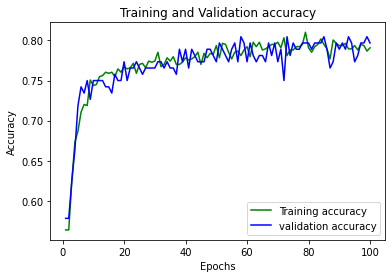

In [17]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7533
Accuracy: 75.33%


#### Model Evaluation
ROC vs AUC implementation using sklearn's roc_auc_score metrics

In [19]:
y_pred_prob_nn_1 = model.predict(X_test)

In [20]:
y_pred_prob_nn_1[:10]

array([[0.24275988],
       [0.9060406 ],
       [0.08321482],
       [0.00534335],
       [0.31255597],
       [0.5726973 ],
       [0.18167165],
       [0.96527416],
       [0.3410148 ],
       [0.11265391]], dtype=float32)

In [21]:
print(roc_auc_score(Y_test,y_pred_prob_nn_1))

0.8233484162895928


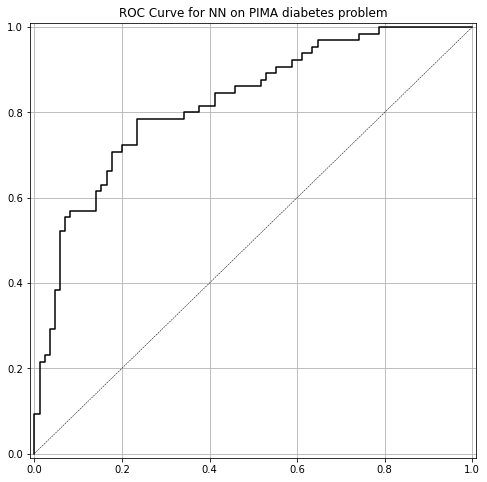

In [22]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    
plot_roc(Y_test, y_pred_prob_nn_1, 'NN')